### Line Chart

- Plot  S&P 500 price on a line chart
    - S&P 500 (^GSPC): data/^GSPC.csv


- color palette: https://color.adobe.com/explore?page=8


- caution:
    - it will take a long time to plot data with more than 5k samples (i.e. rows)
    
- reference:
    1. https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#35.-Time-Series-Plot
    1. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html?highlight=title#matplotlib.pyplot.title
    

In [1]:
import pandas as pd
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print('pandas version: ', pd.__version__)
print('numpy version: ', np.__version__)
print('matplotlib version: ', mpl.__version__)
print('seaborn version: ', sns.__version__)

pandas version:  1.3.4
numpy version:  1.21.4
matplotlib version:  3.5.0
seaborn version:  0.11.2


In [3]:
df_gold=pd.read_csv('data/GC=F.csv', sep='|')
df_sp500=pd.read_csv('data/^GSPC.csv', sep='|')

In [4]:
df_gold.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,0,0,0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,0,0,0


In [5]:
df_sp500.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1,1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0


In [6]:
#combine data
df=df_gold[['Date', 'Close']].merge(df_sp500[['Date', 'Close']], on=['Date'], how='inner')

In [7]:
df.columns=['date', 'gold_price','sp500_price']

In [8]:
df.shape

(5343, 3)

In [9]:
df.head(2)

,date,gold_price,sp500_price
0,2000-08-30,273.899994,1502.589966
1,2000-08-31,278.299988,1517.680054


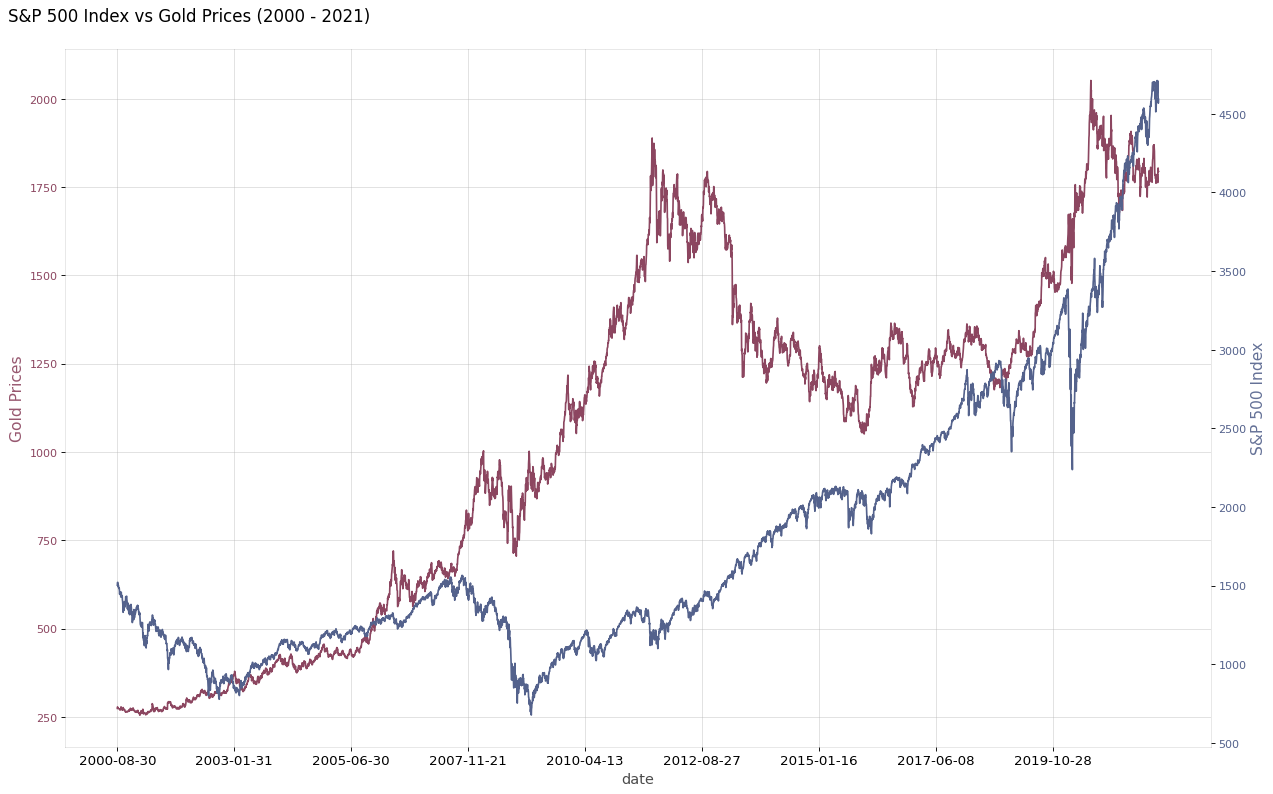

In [10]:
x = df['date']
y1 = df['gold_price']
y2 = df['sp500_price']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,10), dpi= 80)
ax1.plot(x, y1, color='#8C4660')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='#54628C')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('date', fontsize=13, alpha=.7)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Gold Prices', color='#8C4660', fontsize=14, alpha=.9)
ax1.tick_params(axis='y', rotation=0, labelcolor='#8C4660' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("S&P 500 Index", color='#54628C', fontsize=14, alpha=.9)
ax2.tick_params(axis='y', labelcolor='#54628C')
ax2.set_xticks(np.arange(0, len(x), 600))
ax2.set_xticklabels(x[::600], rotation=90, fontdict={'fontsize':10})


plt.title("S&P 500 Index vs Gold Prices (2000 - 2021)", fontsize=15, loc='left', y=1.03, x=-0.05)


# setup grid and borders
#plt.grid(axis='both', alpha=.3)
ax1.spines["top"].set_alpha(0.1)    
ax1.spines["bottom"].set_alpha(0.1)
ax1.spines["right"].set_alpha(0.1)    
ax1.spines["left"].set_alpha(0.1)   
ax2.spines["top"].set_alpha(0.0)    
ax2.spines["bottom"].set_alpha(0.0)
ax2.spines["right"].set_alpha(0.0)    
ax2.spines["left"].set_alpha(0.0)   

fig.tight_layout()
plt.show()

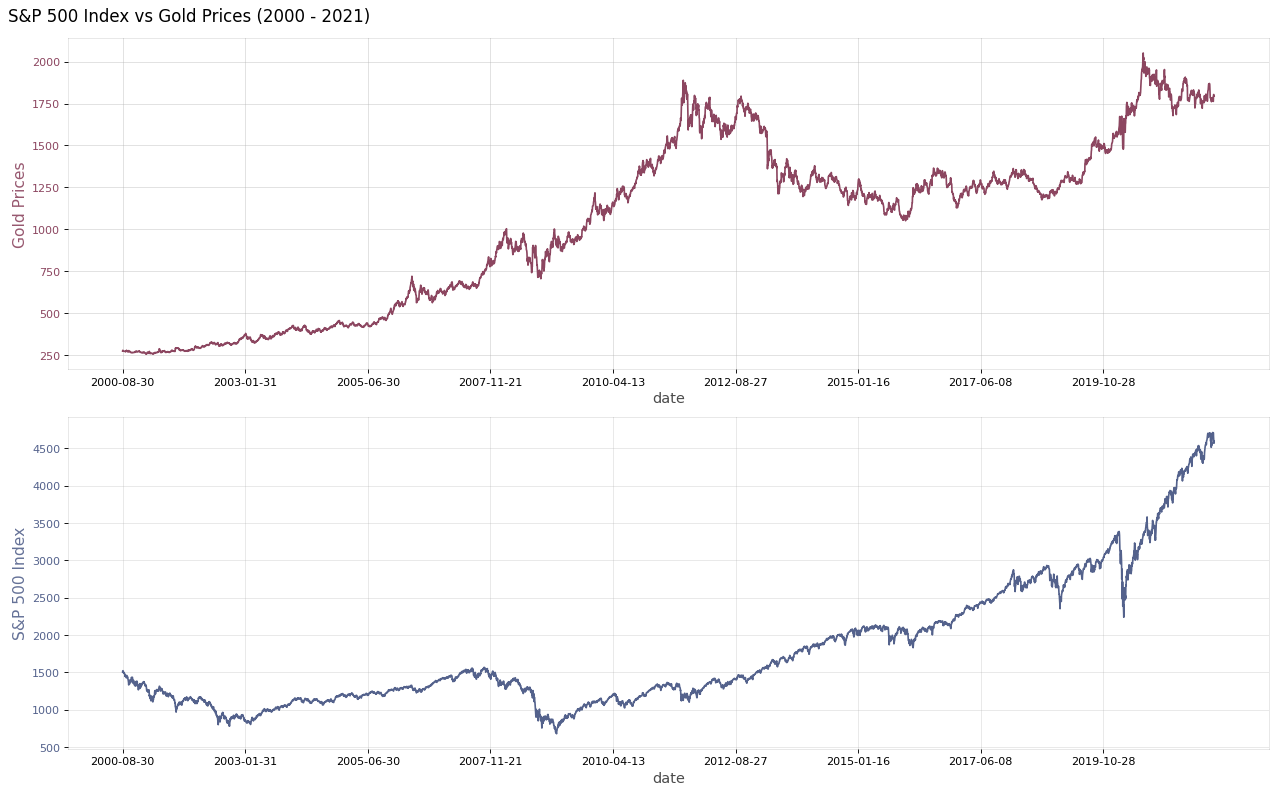

In [11]:
x = df['date']
y1 = df['gold_price']
y2 = df['sp500_price']

#initiate a subplot with 2 rows
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,10), dpi= 80)

#the 1st graph
ax1.plot(x, y1, color='#8C4660')
#---set the x label---------------
ax1.set_xlabel('date', fontsize=13, alpha=.7)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_xticks(np.arange(0, len(x), 600))
ax1.set_xticklabels(x[::600], rotation=0, fontdict={'fontsize':10})

ax1.set_ylabel('Gold Prices', color='#8C4660', fontsize=14, alpha=.9)
ax1.tick_params(axis='y', rotation=0, labelcolor='#8C4660' )
ax1.grid(alpha=.4)
# setup grid and borders
ax1.spines["top"].set_alpha(0.1)    
ax1.spines["bottom"].set_alpha(0.1)
ax1.spines["right"].set_alpha(0.1)    
ax1.spines["left"].set_alpha(0.1)   

ax1.set_title("S&P 500 Index vs Gold Prices (2000 - 2021)", fontsize=15, loc='left', y=1.03, x=-0.05)

#the 2nd graph
ax2.plot(x, y2, color='#54628C')
#---set the x label---------------
ax2.set_xlabel('date', fontsize=13, alpha=.7)
ax2.tick_params(axis='x', rotation=0, labelsize=12)
ax2.set_xticks(np.arange(0, len(x), 600))
ax2.set_xticklabels(x[::600], rotation=0, fontdict={'fontsize':10})

ax2.set_ylabel("S&P 500 Index", color='#54628C', fontsize=14, alpha=.9)
ax2.tick_params(axis='y', labelcolor='#54628C')
ax2.grid(axis='both', alpha=.3) 
ax2.spines["top"].set_alpha(0.1)    
ax2.spines["bottom"].set_alpha(0.1)
ax2.spines["right"].set_alpha(0.1)    
ax2.spines["left"].set_alpha(0.1)   

#ax2.set_title("S&P 500 Index vs Gold Prices (2000 - 2021)", fontsize=15, loc='left', y=1.03, x=-0.05)


fig.tight_layout()
plt.show()

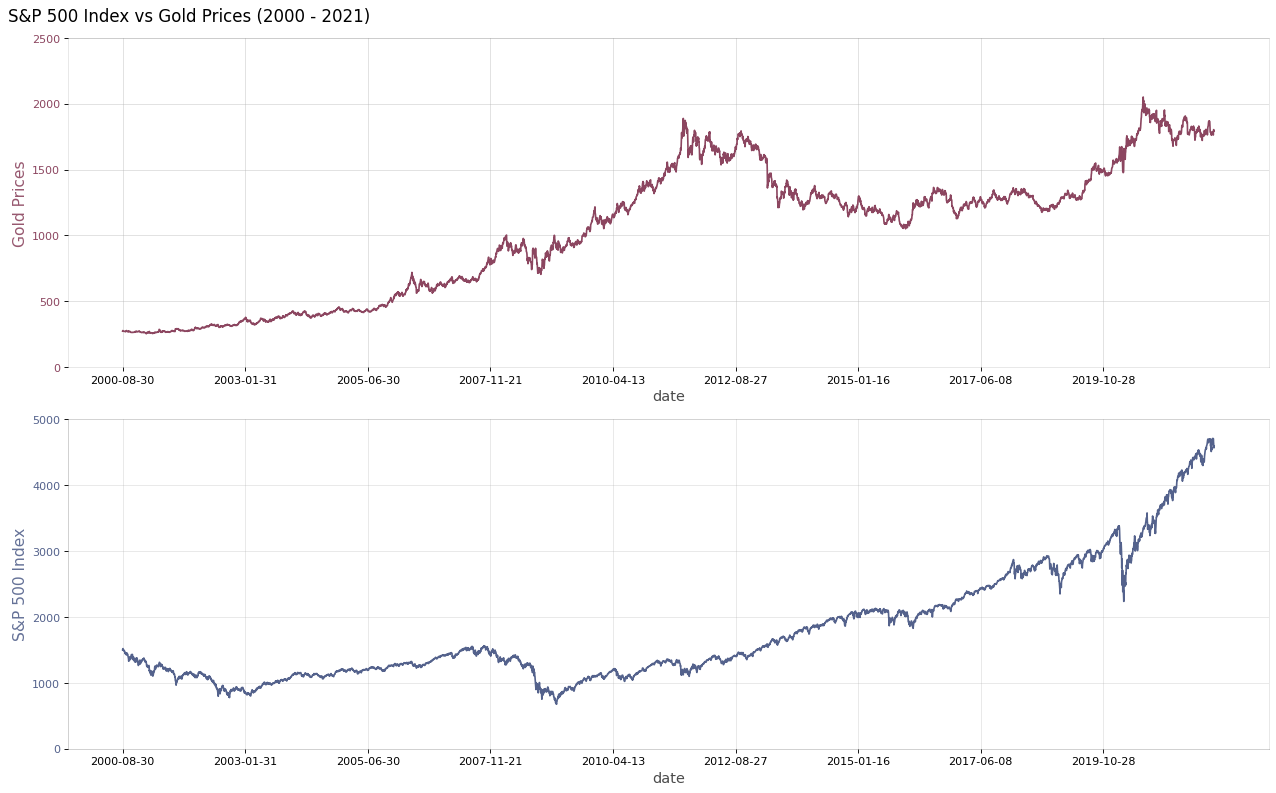

In [61]:
x = df['date']
y1 = df['gold_price']
y2 = df['sp500_price']

#initiate a subplot with 2 rows
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,10), dpi= 80)

#the 1st graph
ax1.plot(x, y1, color='#8C4660')
#---set the x label---------------
ax1.set_xlabel('date', fontsize=13, alpha=.7)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_xticks(np.arange(0, len(x), 600))
ax1.set_xticklabels(x[::600], rotation=0, fontdict={'fontsize':10})

ax1.set_ylabel('Gold Prices', color='#8C4660', fontsize=14, alpha=.9)
ax1.tick_params(axis='y', rotation=0, labelcolor='#8C4660' )
ax1.set_yticks(range(0, 3000, 500))
ax1.set_yticklabels(range(0, 3000, 500), rotation=0, fontdict={'fontsize':10})
ax1.grid(alpha=.4)
# setup grid and borders
ax1.spines[:].set_alpha(0.1)
"""
ax1.spines["top"].set_alpha(0.1)    
ax1.spines["bottom"].set_alpha(0.1)
ax1.spines["right"].set_alpha(0.1)    
ax1.spines["left"].set_alpha(0.1)  
"""

ax1.set_title("S&P 500 Index vs Gold Prices (2000 - 2021)", fontsize=15, loc='left', y=1.03, x=-0.05)

#the 2nd graph
ax2.plot(x, y2, color='#54628C')
#---set the x label---------------
ax2.set_xlabel('date', fontsize=13, alpha=.7)
ax2.tick_params(axis='x', rotation=0, labelsize=12)
ax2.set_xticks(np.arange(0, len(x), 600))
ax2.set_xticklabels(x[::600], rotation=0, fontdict={'fontsize':10})

ax2.set_ylabel("S&P 500 Index", color='#54628C', fontsize=14, alpha=.9)
ax2.tick_params(axis='y', labelcolor='#54628C')
ax2.set_yticks(range(0, 6000, 1000))
ax2.set_yticklabels(range(0, 6000, 1000), rotation=0, fontdict={'fontsize':10})
ax2.grid(axis='both', alpha=.3) 
ax2.spines["top"].set_alpha(0.1)    
ax2.spines["bottom"].set_alpha(0.2)
ax2.spines["right"].set_alpha(0.1)    
ax2.spines["left"].set_alpha(0.2)   

#ax2.set_title("S&P 500 Index vs Gold Prices (2000 - 2021)", fontsize=15, loc='left', y=1.03, x=-0.05)


fig.tight_layout()
plt.show()

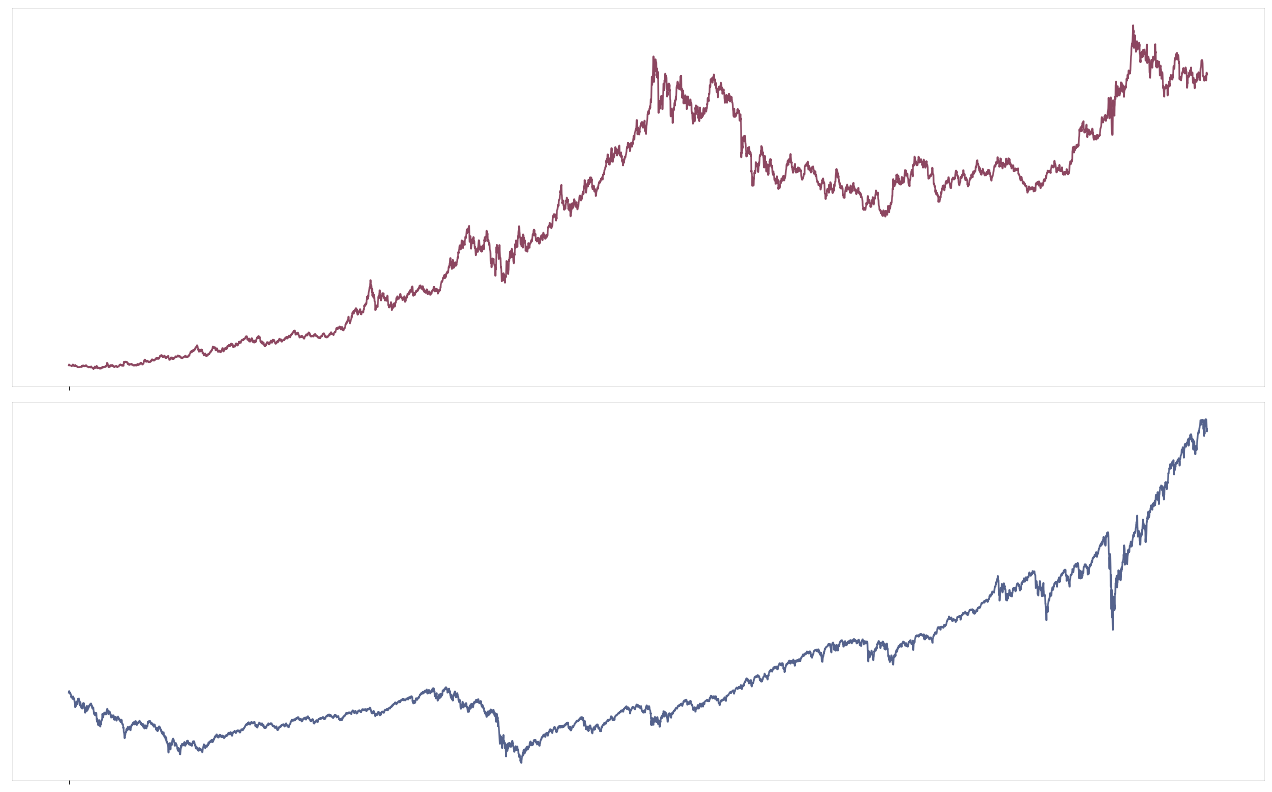

In [59]:
x = df['date']
y1 = df['gold_price']
y2 = df['sp500_price']

#initiate a subplot with 2 rows
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,10), dpi= 80)

#the 1st graph
ax1.plot(x, y1, color='#8C4660')
#---set the x label---------------
ax1.set_xticks([0], alpha=.0)
ax1.set_xticklabels([''], rotation=0, fontdict={'fontsize':10}, alpha=.0)
ax1.set_yticks([0], alpha=.0)
ax1.set_yticklabels([''], rotation=0, fontdict={'fontsize':10}, alpha=.0)

ax1.grid(alpha=.0)
ax1.spines[:].set_alpha(0.1) #set_visible(False)  


#the 2nd graph
ax2.plot(x, y2, color='#54628C')
#---set the x label---------------
ax2.set_xticks([0], alpha=.0)
ax2.set_xticklabels([''], rotation=0, fontdict={'fontsize':10}, alpha=.0)
ax2.set_yticks([0], alpha=.0)
ax2.set_yticklabels([''], rotation=0, fontdict={'fontsize':10}, alpha=.0)

ax2.grid(alpha=.0)
ax2.spines[:].set_alpha(0.1) #set_visible(False) 

fig.tight_layout()
plt.show()